In [60]:
% run audio_utils.ipynb

import tensorflow as tf
import os
from IPython.display import Audio, display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

You are using pip version 9.0.3, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [61]:
content_filename = "coolsaber.wav"
style_filename = "applause2.wav"

In [62]:
display(Audio(content_filename))
display(Audio(style_filename))

In [63]:
audio_utils = AudioUtils()
a_content, sampling_rate = audio_utils.wave_to_spectrogram(content_filename,2048)
a_style, sampling_rate = audio_utils.wave_to_spectrogram(style_filename,2048)

In [64]:
n_samples_time = a_content.shape[1] # considering time domain as samples
n_channels_frequency = a_content.shape[0] # considering frequency domain as channels
a_style = a_style[:n_channels_frequency, :n_samples_time] # making sure style and content tensors have same shape

In [65]:
a_style.shape

(1025, 117)

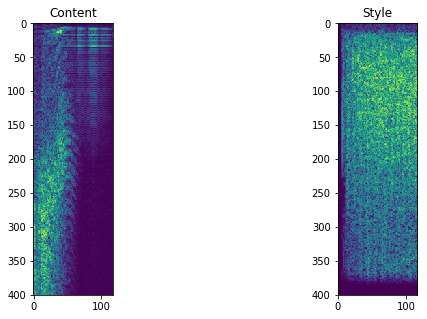

In [66]:
#plotting style and content spectrogram
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Content')
plt.imshow(a_content[:400,:])
plt.subplot(1, 2, 2)
plt.title('Style')
plt.imshow(a_style[:400,:])
plt.show()

In [67]:
a_style.shape

(1025, 117)

In [68]:
x = np.random.randn(1,a_content.shape[0],a_content.shape[1],1)

In [69]:
a_content = a_content.reshape((1,a_content.shape[0],a_content.shape[1],1))

In [70]:
a_content_tf = np.ascontiguousarray(a_content)

In [71]:
a_style = a_style.reshape((1,a_style.shape[0],a_style.shape[1],1))

In [72]:
a_style_tf = np.ascontiguousarray(a_style)

In [73]:
kernel = np.random.randn(3,3,1,5) * 0.01

In [74]:
kernel_2 = np.random.randn(3,3,5,10) * 0.01

In [75]:
g = tf.Graph()
with g.as_default(), g.device('/cpu:0'), tf.Session() as sess:
    y = tf.placeholder('float32', [1,n_channels_frequency,n_samples_time,1], name="y")
    kernel_tf = tf.constant(kernel, name="kernel", dtype='float32')
    conv = tf.nn.conv2d(
            y,
            kernel_tf,
            strides=[1, 1, 1, 1],
            padding="VALID",
            name="conv")
    
    kernel_tf_2 = tf.constant(kernel_2, name="kernel_2", dtype='float32')
    
    conv_2 = tf.nn.conv2d(
            conv,
            kernel_tf_2,
            strides=[1, 1, 1, 1],
            padding="VALID",
            name="conv_2")
    
    net = tf.nn.relu(conv_2)
    content_features = net.eval(feed_dict={y: a_content})
    style_features = net.eval(feed_dict={y: a_style})

In [76]:
style_features.shape

(1, 1021, 113, 10)

In [77]:
features = np.reshape(style_features,(style_features.shape[1] * style_features.shape[2],10))

In [78]:
style_gram = np.matmul(features.T, features) 

In [79]:
result = None
with tf.Graph().as_default():
    x = x = tf.Variable(a_style, name="x")
    #x = tf.Variable(np.random.randn(1,n_channels_frequency,n_samples_time,1).astype(np.float32)*1e-3, name="x")
    
    kernel_tf = tf.constant(kernel, name="kernel", dtype='float32')
    conv = tf.nn.conv2d(
        x,
        kernel_tf,
        strides=[1, 1, 1, 1],
        padding="VALID",
        name="conv")
    
    kernel_tf_2 = tf.constant(kernel_2, name="kernel_2", dtype='float32')
    
    conv_2 = tf.nn.conv2d(
            conv,
            kernel_tf_2,
            strides=[1, 1, 1, 1],
            padding="VALID",
            name="conv_2")
    
    net = tf.nn.relu(conv_2)
    content_loss = tf.nn.l2_loss(
            net - content_features)

    style_loss = 0


    feats = tf.reshape(net,(style_features.shape[1] * style_features.shape[2],10))
    gram = tf.matmul(tf.transpose(feats), feats) 
    style_loss = tf.nn.l2_loss(gram - style_gram)

     # Overall loss
    loss =  content_loss + style_loss

    #opt = tf.contrib.opt.ScipyOptimizerInterface(
          #loss, method='L-BFGS-B', options={'maxiter': 10000})
    opt = tf.train.GradientDescentOptimizer(10).minimize(loss)
    # Optimization
    with tf.Session() as sess:
        sess.run(tf.initialize_all_variables())
        # initial = x.eval()
        # initial = initial.reshape(n_channels_frequency,n_samples_time)
        
        print('Started optimization.')
        for i in range(20000):
            print(i)
            sess.run(opt)
            print(sess.run(loss))
            
        #opt.minimize(sess)

        print ('Final loss:', loss.eval())
        result = x.eval()

Started optimization.
0
1.02347
1
1.02306
2
1.02265
3
1.02224
4
1.02184
5
1.02143
6
1.02103
7
1.02063
8
1.02023
9
1.01983
10
1.01943
11
1.01903
12
1.01864
13
1.01824
14
1.01785
15
1.01746
16
1.01706
17
1.01667
18
1.01628
19
1.0159
20
1.01551
21
1.01512
22
1.01474
23
1.01435
24
1.01397
25
1.01359
26
1.01321
27
1.01283
28
1.01245
29
1.01208
30
1.0117
31
1.01132
32
1.01095
33
1.01058
34
1.01021
35
1.00984
36
1.00947
37
1.0091
38
1.00873
39
1.00837
40
1.008
41
1.00764
42
1.00727
43
1.00691
44
1.00655
45
1.00619
46
1.00583
47
1.00547
48
1.00512
49
1.00476
50
1.00441
51
1.00405
52
1.0037
53
1.00335
54
1.003
55
1.00265
56
1.0023
57
1.00195
58
1.0016
59
1.00126
60
1.00091
61
1.00057
62
1.00023
63
0.999883
64
0.999542
65
0.999202
66
0.998863
67
0.998524
68
0.998187
69
0.997851
70
0.997514
71
0.99718
72
0.996847
73
0.996513
74
0.996181
75
0.995851
76
0.99552
77
0.995191
78
0.994863
79
0.994535
80
0.994208
81
0.993882
82
0.993557
83
0.993233
84
0.992909
85
0.992587
86
0.992266
87
0.991945
88
0.99

0.876988
649
0.876836
650
0.876683
651
0.876531
652
0.876379
653
0.876227
654
0.876074
655
0.875923
656
0.875772
657
0.87562
658
0.875468
659
0.875316
660
0.875165
661
0.875013
662
0.874862
663
0.874711
664
0.87456
665
0.874409
666
0.874258
667
0.874106
668
0.873956
669
0.873805
670
0.873654
671
0.873503
672
0.873353
673
0.873202
674
0.873052
675
0.872902
676
0.872751
677
0.872601
678
0.872451
679
0.872301
680
0.872151
681
0.872001
682
0.871851
683
0.871701
684
0.871552
685
0.871402
686
0.871253
687
0.871104
688
0.870954
689
0.870804
690
0.870656
691
0.870506
692
0.870357
693
0.870208
694
0.870059
695
0.86991
696
0.869761
697
0.869613
698
0.869464
699
0.869315
700
0.869166
701
0.869018
702
0.86887
703
0.86872
704
0.868572
705
0.868424
706
0.868276
707
0.868128
708
0.86798
709
0.867832
710
0.867684
711
0.867536
712
0.867388
713
0.86724
714
0.867093
715
0.866944
716
0.866798
717
0.86665
718
0.866503
719
0.866354
720
0.866208
721
0.866061
722
0.865914
723
0.865766
724
0.86562
725
0.865473

0.792586
1265
0.792461
1266
0.792334
1267
0.792208
1268
0.792081
1269
0.791955
1270
0.791829
1271
0.791703
1272
0.791577
1273
0.791451
1274
0.791324
1275
0.791198
1276
0.791072
1277
0.790946
1278
0.79082
1279
0.790694
1280
0.790568
1281
0.790442
1282
0.790316
1283
0.790191
1284
0.790065
1285
0.789939
1286
0.789813
1287
0.789687
1288
0.789561
1289
0.789436
1290
0.78931
1291
0.789184
1292
0.789058
1293
0.788933
1294
0.788806
1295
0.788682
1296
0.788556
1297
0.788431
1298
0.788305
1299
0.788179
1300
0.788054
1301
0.787929
1302
0.787804
1303
0.787678
1304
0.787553
1305
0.787427
1306
0.787302
1307
0.787177
1308
0.787051
1309
0.786926
1310
0.786801
1311
0.786676
1312
0.786551
1313
0.786426
1314
0.786301
1315
0.786176
1316
0.78605
1317
0.785925
1318
0.7858
1319
0.785676
1320
0.785551
1321
0.785426
1322
0.785302
1323
0.785176
1324
0.785051
1325
0.784926
1326
0.784801
1327
0.784677
1328
0.784552
1329
0.784428
1330
0.784303
1331
0.784179
1332
0.784053
1333
0.783929
1334
0.783805
1335
0.78368
133

0.722003
1858
0.721891
1859
0.721778
1860
0.721667
1861
0.721555
1862
0.721443
1863
0.721332
1864
0.721219
1865
0.721107
1866
0.720995
1867
0.720883
1868
0.720771
1869
0.720659
1870
0.720547
1871
0.720436
1872
0.720324
1873
0.720212
1874
0.7201
1875
0.719989
1876
0.719878
1877
0.719766
1878
0.719655
1879
0.719542
1880
0.719431
1881
0.719319
1882
0.719207
1883
0.719096
1884
0.718985
1885
0.718874
1886
0.718762
1887
0.718651
1888
0.718539
1889
0.718428
1890
0.718317
1891
0.718205
1892
0.718093
1893
0.717983
1894
0.717871
1895
0.71776
1896
0.717649
1897
0.717538
1898
0.717427
1899
0.717316
1900
0.717205
1901
0.717093
1902
0.716982
1903
0.716871
1904
0.71676
1905
0.716649
1906
0.716538
1907
0.716427
1908
0.716316
1909
0.716205
1910
0.716094
1911
0.715983
1912
0.715872
1913
0.715761
1914
0.715651
1915
0.71554
1916
0.715429
1917
0.715318
1918
0.715208
1919
0.715097
1920
0.714986
1921
0.714876
1922
0.714765
1923
0.714654
1924
0.714544
1925
0.714434
1926
0.714323
1927
0.714213
1928
0.714102
19

0.659672
2448
0.659573
2449
0.659473
2450
0.659374
2451
0.659274
2452
0.659175
2453
0.659077
2454
0.658977
2455
0.658878
2456
0.658778
2457
0.65868
2458
0.65858
2459
0.658481
2460
0.658382
2461
0.658282
2462
0.658184
2463
0.658085
2464
0.657985
2465
0.657886
2466
0.657787
2467
0.657688
2468
0.657589
2469
0.65749
2470
0.657391
2471
0.657292
2472
0.657193
2473
0.657095
2474
0.656996
2475
0.656897
2476
0.656798
2477
0.656699
2478
0.6566
2479
0.656501
2480
0.656403
2481
0.656304
2482
0.656205
2483
0.656107
2484
0.656008
2485
0.655909
2486
0.65581
2487
0.655713
2488
0.655614
2489
0.655515
2490
0.655417
2491
0.655318
2492
0.65522
2493
0.655121
2494
0.655022
2495
0.654925
2496
0.654826
2497
0.654728
2498
0.65463
2499
0.654531
2500
0.654433
2501
0.654334
2502
0.654235
2503
0.654137
2504
0.654039
2505
0.653941
2506
0.653842
2507
0.653744
2508
0.653647
2509
0.653548
2510
0.653451
2511
0.653353
2512
0.653254
2513
0.653156
2514
0.653058
2515
0.65296
2516
0.652862
2517
0.652763
2518
0.652665
2519
0

0.604396
3039
0.604308
3040
0.60422
3041
0.604133
3042
0.604045
3043
0.603957
3044
0.60387
3045
0.603781
3046
0.603694
3047
0.603606
3048
0.603519
3049
0.603432
3050
0.603344
3051
0.603256
3052
0.603168
3053
0.603081
3054
0.602993
3055
0.602906
3056
0.602818
3057
0.602731
3058
0.602643
3059
0.602556
3060
0.602468
3061
0.602381
3062
0.602294
3063
0.602206
3064
0.602119
3065
0.602031
3066
0.601944
3067
0.601857
3068
0.601769
3069
0.601683
3070
0.601595
3071
0.601508
3072
0.601421
3073
0.601334
3074
0.601246
3075
0.601159
3076
0.601072
3077
0.600985
3078
0.600898
3079
0.600811
3080
0.600723
3081
0.600637
3082
0.600549
3083
0.600462
3084
0.600376
3085
0.600289
3086
0.600202
3087
0.600114
3088
0.600028
3089
0.599941
3090
0.599854
3091
0.599767
3092
0.59968
3093
0.599593
3094
0.599507
3095
0.59942
3096
0.599333
3097
0.599246
3098
0.59916
3099
0.599073
3100
0.598986
3101
0.5989
3102
0.598813
3103
0.598726
3104
0.59864
3105
0.598553
3106
0.598467
3107
0.59838
3108
0.598294
3109
0.598207
3110
0

0.555698
3629
0.55562
3630
0.555543
3631
0.555465
3632
0.555388
3633
0.55531
3634
0.555234
3635
0.555156
3636
0.555078
3637
0.555002
3638
0.554924
3639
0.554846
3640
0.554769
3641
0.554692
3642
0.554615
3643
0.554538
3644
0.554461
3645
0.554384
3646
0.554306
3647
0.554229
3648
0.554152
3649
0.554075
3650
0.553997
3651
0.55392
3652
0.553843
3653
0.553767
3654
0.55369
3655
0.553613
3656
0.553535
3657
0.553458
3658
0.553381
3659
0.553305
3660
0.553228
3661
0.553151
3662
0.553074
3663
0.552997
3664
0.552921
3665
0.552844
3666
0.552767
3667
0.55269
3668
0.552613
3669
0.552536
3670
0.552459
3671
0.552383
3672
0.552306
3673
0.552229
3674
0.552153
3675
0.552076
3676
0.552
3677
0.551923
3678
0.551846
3679
0.55177
3680
0.551693
3681
0.551617
3682
0.55154
3683
0.551463
3684
0.551387
3685
0.55131
3686
0.551234
3687
0.551157
3688
0.55108
3689
0.551005
3690
0.550928
3691
0.550851
3692
0.550775
3693
0.550699
3694
0.550622
3695
0.550546
3696
0.55047
3697
0.550393
3698
0.550317
3699
0.550241
3700
0.550

0.512675
4221
0.512607
4222
0.512539
4223
0.512472
4224
0.512404
4225
0.512336
4226
0.512268
4227
0.512199
4228
0.512132
4229
0.512063
4230
0.511996
4231
0.511928
4232
0.51186
4233
0.511792
4234
0.511724
4235
0.511656
4236
0.511589
4237
0.511521
4238
0.511453
4239
0.511384
4240
0.511317
4241
0.51125
4242
0.511182
4243
0.511114
4244
0.511047
4245
0.510978
4246
0.510911
4247
0.510843
4248
0.510776
4249
0.510708
4250
0.51064
4251
0.510572
4252
0.510505
4253
0.510437
4254
0.51037
4255
0.510302
4256
0.510235
4257
0.510167
4258
0.5101
4259
0.510032
4260
0.509964
4261
0.509897
4262
0.50983
4263
0.509762
4264
0.509695
4265
0.509628
4266
0.50956
4267
0.509493
4268
0.509425
4269
0.509357
4270
0.50929
4271
0.509223
4272
0.509156
4273
0.509089
4274
0.509022
4275
0.508954
4276
0.508887
4277
0.50882
4278
0.508752
4279
0.508685
4280
0.508618
4281
0.508551
4282
0.508484
4283
0.508416
4284
0.508349
4285
0.508282
4286
0.508215
4287
0.508148
4288
0.508081
4289
0.508014
4290
0.507947
4291
0.50788
4292
0.5

0.474954
4812
0.474895
4813
0.474835
4814
0.474775
4815
0.474715
4816
0.474656
4817
0.474597
4818
0.474537
4819
0.474477
4820
0.474417
4821
0.474358
4822
0.474298
4823
0.474239
4824
0.474179
4825
0.474119
4826
0.47406
4827
0.474
4828
0.473941
4829
0.473881
4830
0.473822
4831
0.473762
4832
0.473703
4833
0.473644
4834
0.473584
4835
0.473525
4836
0.473465
4837
0.473406
4838
0.473347
4839
0.473287
4840
0.473228
4841
0.473168
4842
0.473109
4843
0.473049
4844
0.47299
4845
0.472931
4846
0.472872
4847
0.472813
4848
0.472753
4849
0.472694
4850
0.472635
4851
0.472576
4852
0.472517
4853
0.472457
4854
0.472399
4855
0.472339
4856
0.47228
4857
0.47222
4858
0.472161
4859
0.472102
4860
0.472043
4861
0.471985
4862
0.471925
4863
0.471866
4864
0.471807
4865
0.471748
4866
0.471689
4867
0.47163
4868
0.471571
4869
0.471512
4870
0.471454
4871
0.471394
4872
0.471336
4873
0.471276
4874
0.471217
4875
0.471158
4876
0.4711
4877
0.471041
4878
0.470982
4879
0.470922
4880
0.470864
4881
0.470806
4882
0.470746
4883
0.

0.441882
5403
0.44183
5404
0.441778
5405
0.441725
5406
0.441673
5407
0.441621
5408
0.441569
5409
0.441516
5410
0.441464
5411
0.441411
5412
0.441359
5413
0.441307
5414
0.441255
5415
0.441203
5416
0.441151
5417
0.441099
5418
0.441046
5419
0.440994
5420
0.440942
5421
0.44089
5422
0.440838
5423
0.440786
5424
0.440733
5425
0.440682
5426
0.44063
5427
0.440578
5428
0.440526
5429
0.440473
5430
0.440421
5431
0.44037
5432
0.440318
5433
0.440266
5434
0.440214
5435
0.440162
5436
0.44011
5437
0.440058
5438
0.440006
5439
0.439954
5440
0.439902
5441
0.43985
5442
0.439798
5443
0.439747
5444
0.439695
5445
0.439643
5446
0.439591
5447
0.439539
5448
0.439487
5449
0.439436
5450
0.439384
5451
0.439332
5452
0.439281
5453
0.439228
5454
0.439176
5455
0.439125
5456
0.439073
5457
0.439022
5458
0.43897
5459
0.438918
5460
0.438867
5461
0.438815
5462
0.438763
5463
0.438711
5464
0.43866
5465
0.438609
5466
0.438557
5467
0.438506
5468
0.438454
5469
0.438402
5470
0.438351
5471
0.438299
5472
0.438248
5473
0.438196
5474


0.41284
5996
0.412794
5997
0.412748
5998
0.412703
5999
0.412657
6000
0.412612
6001
0.412565
6002
0.41252
6003
0.412475
6004
0.412429
6005
0.412383
6006
0.412337
6007
0.412292
6008
0.412246
6009
0.412201
6010
0.412155
6011
0.41211
6012
0.412064
6013
0.412018
6014
0.411973
6015
0.411927
6016
0.411881
6017
0.411837
6018
0.411791
6019
0.411745
6020
0.4117
6021
0.411654
6022
0.411609
6023
0.411563
6024
0.411518
6025
0.411472
6026
0.411427
6027
0.411382
6028
0.411336
6029
0.411291
6030
0.411245
6031
0.4112
6032
0.411154
6033
0.41111
6034
0.411064
6035
0.411019
6036
0.410973
6037
0.410928
6038
0.410883
6039
0.410837
6040
0.410792
6041
0.410746
6042
0.410702
6043
0.410657
6044
0.410611
6045
0.410566
6046
0.410521
6047
0.410476
6048
0.410431
6049
0.410385
6050
0.41034
6051
0.410294
6052
0.410249
6053
0.410205
6054
0.410159
6055
0.410114
6056
0.410069
6057
0.410024
6058
0.409978
6059
0.409933
6060
0.409888
6061
0.409844
6062
0.409799
6063
0.409753
6064
0.409708
6065
0.409663
6066
0.409618
6067
0

0.38743
6590
0.38739
6591
0.38735
6592
0.38731
6593
0.38727
6594
0.38723
6595
0.38719
6596
0.38715
6597
0.387111
6598
0.387071
6599
0.387031
6600
0.386991
6601
0.386951
6602
0.386912
6603
0.386872
6604
0.386832
6605
0.386792
6606
0.386752
6607
0.386712
6608
0.386673
6609
0.386633
6610
0.386593
6611
0.386553
6612
0.386514
6613
0.386474
6614
0.386434
6615
0.386395
6616
0.386355
6617
0.386315
6618
0.386276
6619
0.386236
6620
0.386196
6621
0.386157
6622
0.386117
6623
0.386077
6624
0.386038
6625
0.385998
6626
0.385958
6627
0.385919
6628
0.385879
6629
0.38584
6630
0.3858
6631
0.385761
6632
0.385721
6633
0.385682
6634
0.385642
6635
0.385603
6636
0.385563
6637
0.385523
6638
0.385484
6639
0.385444
6640
0.385405
6641
0.385366
6642
0.385326
6643
0.385287
6644
0.385247
6645
0.385208
6646
0.385168
6647
0.385129
6648
0.385089
6649
0.38505
6650
0.385011
6651
0.384971
6652
0.384932
6653
0.384892
6654
0.384853
6655
0.384814
6656
0.384775
6657
0.384735
6658
0.384696
6659
0.384656
6660
0.384617
6661
0.38

0.365362
7181
0.365327
7182
0.365293
7183
0.365258
7184
0.365223
7185
0.365188
7186
0.365153
7187
0.365118
7188
0.365084
7189
0.365049
7190
0.365014
7191
0.364979
7192
0.364945
7193
0.36491
7194
0.364875
7195
0.36484
7196
0.364806
7197
0.364771
7198
0.364736
7199
0.364702
7200
0.364667
7201
0.364632
7202
0.364597
7203
0.364563
7204
0.364528
7205
0.364494
7206
0.364459
7207
0.364424
7208
0.36439
7209
0.364355
7210
0.364321
7211
0.364286
7212
0.364251
7213
0.364217
7214
0.364182
7215
0.364147
7216
0.364113
7217
0.364079
7218
0.364044
7219
0.36401
7220
0.363975
7221
0.363941
7222
0.363906
7223
0.363871
7224
0.363837
7225
0.363802
7226
0.363768
7227
0.363733
7228
0.363699
7229
0.363664
7230
0.36363
7231
0.363595
7232
0.363561
7233
0.363527
7234
0.363492
7235
0.363458
7236
0.363423
7237
0.363389
7238
0.363354
7239
0.36332
7240
0.363286
7241
0.363252
7242
0.363217
7243
0.363183
7244
0.363149
7245
0.363114
7246
0.36308
7247
0.363045
7248
0.363011
7249
0.362977
7250
0.362943
7251
0.362908
7252

0.346118
7772
0.346088
7773
0.346057
7774
0.346027
7775
0.345996
7776
0.345966
7777
0.345936
7778
0.345906
7779
0.345875
7780
0.345845
7781
0.345815
7782
0.345784
7783
0.345754
7784
0.345724
7785
0.345693
7786
0.345663
7787
0.345633
7788
0.345602
7789
0.345573
7790
0.345542
7791
0.345512
7792
0.345482
7793
0.345451
7794
0.345422
7795
0.345391
7796
0.345361
7797
0.345331
7798
0.3453
7799
0.34527
7800
0.34524
7801
0.34521
7802
0.34518
7803
0.345149
7804
0.34512
7805
0.345089
7806
0.345059
7807
0.345029
7808
0.344999
7809
0.344969
7810
0.344939
7811
0.344909
7812
0.344879
7813
0.344848
7814
0.344819
7815
0.344788
7816
0.344758
7817
0.344728
7818
0.344698
7819
0.344668
7820
0.344638
7821
0.344608
7822
0.344578
7823
0.344548
7824
0.344518
7825
0.344488
7826
0.344458
7827
0.344428
7828
0.344398
7829
0.344368
7830
0.344338
7831
0.344308
7832
0.344278
7833
0.344248
7834
0.344218
7835
0.344188
7836
0.344158
7837
0.344129
7838
0.344099
7839
0.344068
7840
0.344039
7841
0.344009
7842
0.343979
7843

0.329348
8363
0.329322
8364
0.329295
8365
0.329269
8366
0.329242
8367
0.329216
8368
0.329189
8369
0.329163
8370
0.329137
8371
0.32911
8372
0.329084
8373
0.329057
8374
0.329031
8375
0.329005
8376
0.328978
8377
0.328952
8378
0.328926
8379
0.328899
8380
0.328873
8381
0.328847
8382
0.32882
8383
0.328794
8384
0.328767
8385
0.328741
8386
0.328715
8387
0.328689
8388
0.328662
8389
0.328636
8390
0.328609
8391
0.328583
8392
0.328557
8393
0.328531
8394
0.328505
8395
0.328479
8396
0.328452
8397
0.328426
8398
0.3284
8399
0.328373
8400
0.328347
8401
0.328321
8402
0.328295
8403
0.328269
8404
0.328242
8405
0.328216
8406
0.32819
8407
0.328163
8408
0.328138
8409
0.328111
8410
0.328085
8411
0.328059
8412
0.328032
8413
0.328007
8414
0.32798
8415
0.327954
8416
0.327928
8417
0.327902
8418
0.327876
8419
0.32785
8420
0.327824
8421
0.327798
8422
0.327771
8423
0.327745
8424
0.327719
8425
0.327693
8426
0.327667
8427
0.327641
8428
0.327615
8429
0.327589
8430
0.327563
8431
0.327537
8432
0.327511
8433
0.327485
8434

0.31472
8955
0.314697
8956
0.314674
8957
0.314651
8958
0.314628
8959
0.314605
8960
0.314582
8961
0.314559
8962
0.314536
8963
0.314512
8964
0.31449
8965
0.314467
8966
0.314444
8967
0.314421
8968
0.314398
8969
0.314375
8970
0.314352
8971
0.314329
8972
0.314306
8973
0.314283
8974
0.314261
8975
0.314237
8976
0.314215
8977
0.314192
8978
0.314169
8979
0.314146
8980
0.314123
8981
0.3141
8982
0.314077
8983
0.314054
8984
0.314031
8985
0.314008
8986
0.313985
8987
0.313963
8988
0.31394
8989
0.313917
8990
0.313894
8991
0.313871
8992
0.313848
8993
0.313826
8994
0.313803
8995
0.31378
8996
0.313757
8997
0.313734
8998
0.313712
8999
0.313689
9000
0.313666
9001
0.313643
9002
0.31362
9003
0.313598
9004
0.313575
9005
0.313552
9006
0.313529
9007
0.313507
9008
0.313484
9009
0.313461
9010
0.313438
9011
0.313416
9012
0.313393
9013
0.31337
9014
0.313348
9015
0.313325
9016
0.313302
9017
0.313279
9018
0.313257
9019
0.313234
9020
0.313211
9021
0.313189
9022
0.313166
9023
0.313143
9024
0.313121
9025
0.313098
9026


0.302012
9546
0.301992
9547
0.301972
9548
0.301952
9549
0.301932
9550
0.301912
9551
0.301892
9552
0.301872
9553
0.301852
9554
0.301832
9555
0.301812
9556
0.301792
9557
0.301772
9558
0.301752
9559
0.301732
9560
0.301712
9561
0.301692
9562
0.301672
9563
0.301652
9564
0.301632
9565
0.301612
9566
0.301592
9567
0.301572
9568
0.301552
9569
0.301532
9570
0.301512
9571
0.301492
9572
0.301473
9573
0.301453
9574
0.301433
9575
0.301413
9576
0.301393
9577
0.301373
9578
0.301354
9579
0.301333
9580
0.301313
9581
0.301294
9582
0.301273
9583
0.301254
9584
0.301234
9585
0.301214
9586
0.301194
9587
0.301174
9588
0.301154
9589
0.301135
9590
0.301115
9591
0.301095
9592
0.301075
9593
0.301055
9594
0.301035
9595
0.301016
9596
0.300996
9597
0.300976
9598
0.300956
9599
0.300937
9600
0.300917
9601
0.300897
9602
0.300877
9603
0.300857
9604
0.300838
9605
0.300818
9606
0.300798
9607
0.300778
9608
0.300759
9609
0.300739
9610
0.300719
9611
0.300699
9612
0.30068
9613
0.30066
9614
0.30064
9615
0.30062
9616
0.300601
9

0.291113
10128
0.291096
10129
0.291079
10130
0.291061
10131
0.291043
10132
0.291026
10133
0.291008
10134
0.290991
10135
0.290973
10136
0.290956
10137
0.290939
10138
0.290921
10139
0.290904
10140
0.290886
10141
0.290869
10142
0.290852
10143
0.290835
10144
0.290817
10145
0.2908
10146
0.290782
10147
0.290765
10148
0.290747
10149
0.29073
10150
0.290713
10151
0.290695
10152
0.290678
10153
0.29066
10154
0.290643
10155
0.290626
10156
0.290609
10157
0.290591
10158
0.290574
10159
0.290556
10160
0.290539
10161
0.290522
10162
0.290504
10163
0.290487
10164
0.29047
10165
0.290452
10166
0.290435
10167
0.290418
10168
0.2904
10169
0.290383
10170
0.290365
10171
0.290349
10172
0.290331
10173
0.290314
10174
0.290297
10175
0.29028
10176
0.290262
10177
0.290245
10178
0.290228
10179
0.29021
10180
0.290193
10181
0.290176
10182
0.290159
10183
0.290141
10184
0.290124
10185
0.290107
10186
0.29009
10187
0.290072
10188
0.290055
10189
0.290038
10190
0.290021
10191
0.290004
10192
0.289986
10193
0.289969
10194
0.289

0.282072
10680
0.282057
10681
0.282042
10682
0.282027
10683
0.282012
10684
0.281996
10685
0.281981
10686
0.281966
10687
0.281951
10688
0.281935
10689
0.28192
10690
0.281904
10691
0.281889
10692
0.281874
10693
0.281859
10694
0.281843
10695
0.281828
10696
0.281813
10697
0.281798
10698
0.281782
10699
0.281767
10700
0.281752
10701
0.281737
10702
0.281721
10703
0.281706
10704
0.281691
10705
0.281676
10706
0.281661
10707
0.281645
10708
0.28163
10709
0.281615
10710
0.281599
10711
0.281584
10712
0.281569
10713
0.281554
10714
0.281539
10715
0.281523
10716
0.281508
10717
0.281493
10718
0.281478
10719
0.281463
10720
0.281447
10721
0.281433
10722
0.281417
10723
0.281402
10724
0.281387
10725
0.281371
10726
0.281356
10727
0.281341
10728
0.281326
10729
0.281311
10730
0.281296
10731
0.28128
10732
0.281265
10733
0.28125
10734
0.281235
10735
0.28122
10736
0.281205
10737
0.28119
10738
0.281175
10739
0.28116
10740
0.281144
10741
0.281129
10742
0.281114
10743
0.281099
10744
0.281084
10745
0.281069
10746
0.

0.274167
11230
0.274153
11231
0.27414
11232
0.274127
11233
0.274113
11234
0.2741
11235
0.274086
11236
0.274073
11237
0.274059
11238
0.274046
11239
0.274032
11240
0.274019
11241
0.274005
11242
0.273992
11243
0.273979
11244
0.273965
11245
0.273952
11246
0.273939
11247
0.273925
11248
0.273912
11249
0.273898
11250
0.273885
11251
0.273872
11252
0.273858
11253
0.273845
11254
0.273831
11255
0.273818
11256
0.273805
11257
0.273791
11258
0.273778
11259
0.273765
11260
0.273751
11261
0.273738
11262
0.273724
11263
0.273711
11264
0.273698
11265
0.273684
11266
0.273671
11267
0.273658
11268
0.273644
11269
0.273631
11270
0.273618
11271
0.273605
11272
0.273591
11273
0.273578
11274
0.273564
11275
0.273551
11276
0.273538
11277
0.273525
11278
0.273512
11279
0.273498
11280
0.273485
11281
0.273471
11282
0.273458
11283
0.273445
11284
0.273432
11285
0.273418
11286
0.273405
11287
0.273392
11288
0.273378
11289
0.273365
11290
0.273352
11291
0.273339
11292
0.273325
11293
0.273312
11294
0.273299
11295
0.273286
1129

0.267225
11780
0.267213
11781
0.267201
11782
0.26719
11783
0.267178
11784
0.267166
11785
0.267154
11786
0.267142
11787
0.26713
11788
0.267119
11789
0.267107
11790
0.267095
11791
0.267083
11792
0.267071
11793
0.26706
11794
0.267048
11795
0.267036
11796
0.267024
11797
0.267013
11798
0.267001
11799
0.266989
11800
0.266977
11801
0.266965
11802
0.266954
11803
0.266942
11804
0.266931
11805
0.266919
11806
0.266907
11807
0.266895
11808
0.266884
11809
0.266872
11810
0.26686
11811
0.266848
11812
0.266836
11813
0.266825
11814
0.266813
11815
0.266801
11816
0.266789
11817
0.266778
11818
0.266766
11819
0.266754
11820
0.266743
11821
0.266731
11822
0.266719
11823
0.266708
11824
0.266696
11825
0.266684
11826
0.266672
11827
0.266661
11828
0.266649
11829
0.266638
11830
0.266626
11831
0.266614
11832
0.266602
11833
0.266591
11834
0.266579
11835
0.266567
11836
0.266556
11837
0.266544
11838
0.266533
11839
0.266521
11840
0.266509
11841
0.266498
11842
0.266486
11843
0.266474
11844
0.266463
11845
0.266451
11846

0.261098
12333
0.261088
12334
0.261078
12335
0.261067
12336
0.261057
12337
0.261046
12338
0.261036
12339
0.261026
12340
0.261015
12341
0.261005
12342
0.260995
12343
0.260985
12344
0.260974
12345
0.260964
12346
0.260954
12347
0.260943
12348
0.260933
12349
0.260922
12350
0.260912
12351
0.260902
12352
0.260891
12353
0.260881
12354
0.260871
12355
0.260861
12356
0.26085
12357
0.26084
12358
0.26083
12359
0.260819
12360
0.260809
12361
0.260798
12362
0.260789
12363
0.260778
12364
0.260768
12365
0.260758
12366
0.260747
12367
0.260737
12368
0.260727
12369
0.260716
12370
0.260706
12371
0.260696
12372
0.260686
12373
0.260675
12374
0.260665
12375
0.260655
12376
0.260645
12377
0.260634
12378
0.260624
12379
0.260613
12380
0.260603
12381
0.260593
12382
0.260583
12383
0.260573
12384
0.260562
12385
0.260552
12386
0.260542
12387
0.260532
12388
0.260521
12389
0.260511
12390
0.260501
12391
0.260491
12392
0.260481
12393
0.26047
12394
0.26046
12395
0.26045
12396
0.26044
12397
0.26043
12398
0.260419
12399
0.2

0.255741
12884
0.255732
12885
0.255723
12886
0.255714
12887
0.255705
12888
0.255696
12889
0.255687
12890
0.255678
12891
0.255669
12892
0.25566
12893
0.255651
12894
0.255641
12895
0.255632
12896
0.255623
12897
0.255614
12898
0.255605
12899
0.255596
12900
0.255587
12901
0.255578
12902
0.255569
12903
0.25556
12904
0.255551
12905
0.255542
12906
0.255533
12907
0.255524
12908
0.255515
12909
0.255505
12910
0.255496
12911
0.255487
12912
0.255478
12913
0.255469
12914
0.25546
12915
0.255451
12916
0.255442
12917
0.255433
12918
0.255424
12919
0.255415
12920
0.255406
12921
0.255397
12922
0.255388
12923
0.255379
12924
0.25537
12925
0.255361
12926
0.255352
12927
0.255343
12928
0.255334
12929
0.255325
12930
0.255316
12931
0.255307
12932
0.255298
12933
0.255289
12934
0.25528
12935
0.255271
12936
0.255262
12937
0.255253
12938
0.255244
12939
0.255235
12940
0.255226
12941
0.255217
12942
0.255208
12943
0.255199
12944
0.25519
12945
0.255181
12946
0.255172
12947
0.255163
12948
0.255154
12949
0.255145
12950
0

0.251031
13436
0.251023
13437
0.251015
13438
0.251007
13439
0.250999
13440
0.250991
13441
0.250983
13442
0.250975
13443
0.250967
13444
0.250959
13445
0.250951
13446
0.250943
13447
0.250935
13448
0.250927
13449
0.250919
13450
0.250911
13451
0.250903
13452
0.250895
13453
0.250887
13454
0.250879
13455
0.250871
13456
0.250864
13457
0.250856
13458
0.250848
13459
0.25084
13460
0.250832
13461
0.250824
13462
0.250816
13463
0.250808
13464
0.2508
13465
0.250792
13466
0.250784
13467
0.250776
13468
0.250768
13469
0.25076
13470
0.250752
13471
0.250744
13472
0.250736
13473
0.250729
13474
0.250721
13475
0.250713
13476
0.250705
13477
0.250697
13478
0.250689
13479
0.250681
13480
0.250673
13481
0.250665
13482
0.250657
13483
0.250649
13484
0.250641
13485
0.250634
13486
0.250626
13487
0.250618
13488
0.25061
13489
0.250602
13490
0.250594
13491
0.250586
13492
0.250578
13493
0.25057
13494
0.250563
13495
0.250555
13496
0.250547
13497
0.250539
13498
0.250531
13499
0.250523
13500
0.250515
13501
0.250508
13502
0

0.246903
13987
0.246896
13988
0.246889
13989
0.246882
13990
0.246875
13991
0.246868
13992
0.246861
13993
0.246854
13994
0.246847
13995
0.24684
13996
0.246833
13997
0.246826
13998
0.246819
13999
0.246812
14000
0.246805
14001
0.246798
14002
0.246791
14003
0.246784
14004
0.246777
14005
0.24677
14006
0.246763
14007
0.246756
14008
0.246749
14009
0.246742
14010
0.246735
14011
0.246728
14012
0.246721
14013
0.246714
14014
0.246707
14015
0.2467
14016
0.246693
14017
0.246686
14018
0.246679
14019
0.246672
14020
0.246665
14021
0.246658
14022
0.246651
14023
0.246644
14024
0.246637
14025
0.24663
14026
0.246623
14027
0.246616
14028
0.246609
14029
0.246603
14030
0.246596
14031
0.246589
14032
0.246582
14033
0.246575
14034
0.246568
14035
0.246561
14036
0.246554
14037
0.246547
14038
0.24654
14039
0.246533
14040
0.246526
14041
0.246519
14042
0.246512
14043
0.246506
14044
0.246499
14045
0.246492
14046
0.246485
14047
0.246478
14048
0.246471
14049
0.246464
14050
0.246457
14051
0.24645
14052
0.246443
14053
0.

0.243279
14538
0.243273
14539
0.243266
14540
0.24326
14541
0.243254
14542
0.243248
14543
0.243242
14544
0.243236
14545
0.24323
14546
0.243224
14547
0.243217
14548
0.243211
14549
0.243205
14550
0.243199
14551
0.243193
14552
0.243187
14553
0.24318
14554
0.243174
14555
0.243168
14556
0.243162
14557
0.243156
14558
0.24315
14559
0.243144
14560
0.243138
14561
0.243132
14562
0.243125
14563
0.243119
14564
0.243113
14565
0.243107
14566
0.243101
14567
0.243095
14568
0.243089
14569
0.243083
14570
0.243076
14571
0.24307
14572
0.243064
14573
0.243058
14574
0.243052
14575
0.243046
14576
0.24304
14577
0.243034
14578
0.243028
14579
0.243022
14580
0.243016
14581
0.243009
14582
0.243003
14583
0.242997
14584
0.242991
14585
0.242985
14586
0.242979
14587
0.242973
14588
0.242967
14589
0.242961
14590
0.242955
14591
0.242949
14592
0.242942
14593
0.242936
14594
0.24293
14595
0.242924
14596
0.242918
14597
0.242912
14598
0.242906
14599
0.2429
14600
0.242894
14601
0.242888
14602
0.242882
14603
0.242876
14604
0.24

0.240092
15090
0.240087
15091
0.240082
15092
0.240076
15093
0.240071
15094
0.240065
15095
0.24006
15096
0.240055
15097
0.240049
15098
0.240044
15099
0.240038
15100
0.240033
15101
0.240028
15102
0.240022
15103
0.240017
15104
0.240011
15105
0.240006
15106
0.240001
15107
0.239995
15108
0.23999
15109
0.239984
15110
0.239979
15111
0.239974
15112
0.239968
15113
0.239963
15114
0.239958
15115
0.239952
15116
0.239947
15117
0.239942
15118
0.239936
15119
0.239931
15120
0.239926
15121
0.23992
15122
0.239915
15123
0.239909
15124
0.239904
15125
0.239899
15126
0.239893
15127
0.239888
15128
0.239882
15129
0.239877
15130
0.239872
15131
0.239866
15132
0.239861
15133
0.239856
15134
0.23985
15135
0.239845
15136
0.23984
15137
0.239834
15138
0.239829
15139
0.239824
15140
0.239818
15141
0.239813
15142
0.239808
15143
0.239802
15144
0.239797
15145
0.239792
15146
0.239786
15147
0.239781
15148
0.239776
15149
0.23977
15150
0.239765
15151
0.23976
15152
0.239754
15153
0.239749
15154
0.239744
15155
0.239738
15156
0.

0.237304
15640
0.2373
15641
0.237295
15642
0.237291
15643
0.237286
15644
0.237281
15645
0.237276
15646
0.237272
15647
0.237267
15648
0.237262
15649
0.237257
15650
0.237253
15651
0.237248
15652
0.237243
15653
0.237238
15654
0.237234
15655
0.237229
15656
0.237224
15657
0.237219
15658
0.237215
15659
0.23721
15660
0.237205
15661
0.237201
15662
0.237196
15663
0.237191
15664
0.237186
15665
0.237182
15666
0.237177
15667
0.237172
15668
0.237168
15669
0.237163
15670
0.237158
15671
0.237154
15672
0.237149
15673
0.237144
15674
0.237139
15675
0.237135
15676
0.23713
15677
0.237125
15678
0.23712
15679
0.237116
15680
0.237111
15681
0.237106
15682
0.237102
15683
0.237097
15684
0.237092
15685
0.237087
15686
0.237083
15687
0.237078
15688
0.237074
15689
0.237069
15690
0.237064
15691
0.237059
15692
0.237055
15693
0.23705
15694
0.237045
15695
0.237041
15696
0.237036
15697
0.237031
15698
0.237027
15699
0.237022
15700
0.237017
15701
0.237013
15702
0.237008
15703
0.237003
15704
0.236999
15705
0.236994
15706
0

0.234847
16192
0.234842
16193
0.234838
16194
0.234834
16195
0.23483
16196
0.234826
16197
0.234822
16198
0.234818
16199
0.234814
16200
0.234809
16201
0.234805
16202
0.234801
16203
0.234797
16204
0.234793
16205
0.234789
16206
0.234784
16207
0.23478
16208
0.234776
16209
0.234772
16210
0.234768
16211
0.234764
16212
0.234759
16213
0.234755
16214
0.234751
16215
0.234747
16216
0.234743
16217
0.234739
16218
0.234735
16219
0.234731
16220
0.234726
16221
0.234722
16222
0.234718
16223
0.234714
16224
0.23471
16225
0.234706
16226
0.234701
16227
0.234697
16228
0.234693
16229
0.234689
16230
0.234685
16231
0.234681
16232
0.234677
16233
0.234673
16234
0.234668
16235
0.234664
16236
0.23466
16237
0.234656
16238
0.234652
16239
0.234648
16240
0.234644
16241
0.234639
16242
0.234636
16243
0.234631
16244
0.234628
16245
0.234623
16246
0.234619
16247
0.234615
16248
0.234611
16249
0.234606
16250
0.234603
16251
0.234598
16252
0.234594
16253
0.23459
16254
0.234586
16255
0.234582
16256
0.234578
16257
0.234574
16258


0.232687
16744
0.232684
16745
0.23268
16746
0.232676
16747
0.232673
16748
0.232669
16749
0.232665
16750
0.232662
16751
0.232658
16752
0.232654
16753
0.232651
16754
0.232647
16755
0.232643
16756
0.23264
16757
0.232636
16758
0.232633
16759
0.232629
16760
0.232625
16761
0.232621
16762
0.232618
16763
0.232614
16764
0.23261
16765
0.232607
16766
0.232603
16767
0.2326
16768
0.232596
16769
0.232592
16770
0.232589
16771
0.232585
16772
0.232582
16773
0.232578
16774
0.232574
16775
0.23257
16776
0.232567
16777
0.232563
16778
0.23256
16779
0.232556
16780
0.232552
16781
0.232549
16782
0.232545
16783
0.232541
16784
0.232538
16785
0.232534
16786
0.232531
16787
0.232527
16788
0.232523
16789
0.23252
16790
0.232516
16791
0.232512
16792
0.232509
16793
0.232505
16794
0.232502
16795
0.232498
16796
0.232494
16797
0.232491
16798
0.232487
16799
0.232483
16800
0.23248
16801
0.232476
16802
0.232472
16803
0.232469
16804
0.232465
16805
0.232462
16806
0.232458
16807
0.232455
16808
0.232451
16809
0.232447
16810
0.23

0.230796
17294
0.230793
17295
0.230789
17296
0.230786
17297
0.230783
17298
0.230779
17299
0.230777
17300
0.230773
17301
0.23077
17302
0.230767
17303
0.230763
17304
0.23076
17305
0.230757
17306
0.230754
17307
0.230751
17308
0.230747
17309
0.230744
17310
0.230741
17311
0.230738
17312
0.230735
17313
0.230731
17314
0.230728
17315
0.230725
17316
0.230721
17317
0.230718
17318
0.230715
17319
0.230712
17320
0.230709
17321
0.230706
17322
0.230702
17323
0.230699
17324
0.230696
17325
0.230693
17326
0.23069
17327
0.230687
17328
0.230683
17329
0.23068
17330
0.230677
17331
0.230674
17332
0.23067
17333
0.230667
17334
0.230664
17335
0.230661
17336
0.230658
17337
0.230655
17338
0.230651
17339
0.230648
17340
0.230645
17341
0.230642
17342
0.230639
17343
0.230635
17344
0.230632
17345
0.230629
17346
0.230626
17347
0.230623
17348
0.230619
17349
0.230616
17350
0.230613
17351
0.23061
17352
0.230607
17353
0.230604
17354
0.2306
17355
0.230597
17356
0.230594
17357
0.230591
17358
0.230587
17359
0.230584
17360
0.2

0.229126
17846
0.229124
17847
0.229121
17848
0.229118
17849
0.229115
17850
0.229112
17851
0.229109
17852
0.229107
17853
0.229104
17854
0.229101
17855
0.229098
17856
0.229095
17857
0.229092
17858
0.22909
17859
0.229087
17860
0.229084
17861
0.229081
17862
0.229078
17863
0.229075
17864
0.229073
17865
0.22907
17866
0.229067
17867
0.229064
17868
0.229061
17869
0.229059
17870
0.229056
17871
0.229053
17872
0.22905
17873
0.229047
17874
0.229045
17875
0.229042
17876
0.229039
17877
0.229036
17878
0.229033
17879
0.22903
17880
0.229028
17881
0.229025
17882
0.229022
17883
0.229019
17884
0.229016
17885
0.229013
17886
0.229011
17887
0.229008
17888
0.229005
17889
0.229002
17890
0.229
17891
0.228997
17892
0.228994
17893
0.228991
17894
0.228988
17895
0.228985
17896
0.228983
17897
0.22898
17898
0.228977
17899
0.228975
17900
0.228971
17901
0.228969
17902
0.228966
17903
0.228963
17904
0.228961
17905
0.228958
17906
0.228955
17907
0.228952
17908
0.228949
17909
0.228946
17910
0.228944
17911
0.228941
17912
0.2

0.227656
18399
0.227653
18400
0.227651
18401
0.227648
18402
0.227646
18403
0.227643
18404
0.227641
18405
0.227638
18406
0.227636
18407
0.227633
18408
0.227631
18409
0.227628
18410
0.227626
18411
0.227623
18412
0.227621
18413
0.227618
18414
0.227616
18415
0.227613
18416
0.227611
18417
0.227608
18418
0.227606
18419
0.227604
18420
0.227601
18421
0.227599
18422
0.227596
18423
0.227593
18424
0.227591
18425
0.227589
18426
0.227586
18427
0.227584
18428
0.227581
18429
0.227579
18430
0.227577
18431
0.227574
18432
0.227571
18433
0.227569
18434
0.227566
18435
0.227564
18436
0.227561
18437
0.227559
18438
0.227557
18439
0.227554
18440
0.227552
18441
0.227549
18442
0.227547
18443
0.227544
18444
0.227542
18445
0.22754
18446
0.227537
18447
0.227534
18448
0.227532
18449
0.227529
18450
0.227527
18451
0.227524
18452
0.227522
18453
0.22752
18454
0.227517
18455
0.227515
18456
0.227512
18457
0.22751
18458
0.227507
18459
0.227505
18460
0.227502
18461
0.2275
18462
0.227498
18463
0.227495
18464
0.227492
18465


0.226362
18952
0.226359
18953
0.226357
18954
0.226355
18955
0.226353
18956
0.226351
18957
0.226348
18958
0.226346
18959
0.226344
18960
0.226342
18961
0.22634
18962
0.226337
18963
0.226335
18964
0.226333
18965
0.226331
18966
0.226329
18967
0.226327
18968
0.226325
18969
0.226322
18970
0.22632
18971
0.226318
18972
0.226316
18973
0.226314
18974
0.226311
18975
0.226309
18976
0.226307
18977
0.226305
18978
0.226302
18979
0.2263
18980
0.226298
18981
0.226296
18982
0.226294
18983
0.226292
18984
0.226289
18985
0.226287
18986
0.226285
18987
0.226283
18988
0.226281
18989
0.226279
18990
0.226277
18991
0.226274
18992
0.226272
18993
0.22627
18994
0.226268
18995
0.226266
18996
0.226263
18997
0.226261
18998
0.226259
18999
0.226257
19000
0.226255
19001
0.226253
19002
0.22625
19003
0.226248
19004
0.226246
19005
0.226244
19006
0.226242
19007
0.226239
19008
0.226237
19009
0.226235
19010
0.226233
19011
0.226231
19012
0.226229
19013
0.226227
19014
0.226224
19015
0.226222
19016
0.22622
19017
0.226218
19018
0.

0.225227
19502
0.225225
19503
0.225223
19504
0.225221
19505
0.22522
19506
0.225218
19507
0.225216
19508
0.225214
19509
0.225212
19510
0.22521
19511
0.225208
19512
0.225206
19513
0.225204
19514
0.225202
19515
0.2252
19516
0.225198
19517
0.225196
19518
0.225194
19519
0.225193
19520
0.22519
19521
0.225189
19522
0.225186
19523
0.225185
19524
0.225183
19525
0.225181
19526
0.225179
19527
0.225177
19528
0.225175
19529
0.225173
19530
0.225171
19531
0.225169
19532
0.225168
19533
0.225166
19534
0.225164
19535
0.225162
19536
0.22516
19537
0.225158
19538
0.225156
19539
0.225154
19540
0.225152
19541
0.22515
19542
0.225149
19543
0.225146
19544
0.225144
19545
0.225143
19546
0.225141
19547
0.225139
19548
0.225137
19549
0.225135
19550
0.225133
19551
0.225131
19552
0.225129
19553
0.225127
19554
0.225125
19555
0.225123
19556
0.225121
19557
0.225119
19558
0.225118
19559
0.225116
19560
0.225114
19561
0.225112
19562
0.22511
19563
0.225108
19564
0.225106
19565
0.225104
19566
0.225102
19567
0.225101
19568
0.2

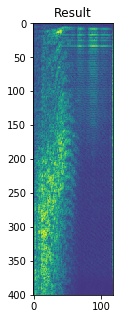

In [80]:
result = result.reshape(n_channels_frequency,n_samples_time)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Result')
plt.imshow(result[:400,:])

In [81]:
audio_utils = AudioUtils()
a_content, sampling_rate = audio_utils.wave_to_spectrogram(content_filename,2048)
a_style, sampling_rate = audio_utils.wave_to_spectrogram(style_filename,2048)

In [82]:
n_samples_time = a_content.shape[1] # considering time domain as samples
n_channels_frequency = a_content.shape[0] # considering frequency domain as channels
a_style = a_style[:n_channels_frequency, :n_samples_time] # making sure style and content tensors have same shape

In [83]:
audio_utils.spectrogram_to_wave(result , 2048 , "out3.wav", sampling_rate)

In [84]:
display(Audio("out3.wav"))

In [85]:
display(Audio(content_filename))
display(Audio(style_filename))

In [86]:
sum(sum(np.square(result - a_content)))

24320.128400802612

In [87]:
sum(sum(np.square(result - a_style)))

103883.61367034912